In [135]:
import numpy as np
import pandas as pd

np.random.seed(23)

In [136]:
mu_vec1=np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

In [137]:
df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

In [138]:
df4=df

In [139]:
mu_vec2= np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

In [140]:
df2=pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

In [141]:
df2['target']=0

In [142]:
df=pd.concat([df,df2])

In [143]:
df=df.sample(40)

In [144]:
df4=df

In [145]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
14,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [146]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()
     
import plotly.io as pio
pio.renderers.default = 'browser'  # Opens the plot in your default web browser

In [147]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [148]:
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [149]:
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])

In [150]:
print(covariance_matrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [151]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [152]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [153]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

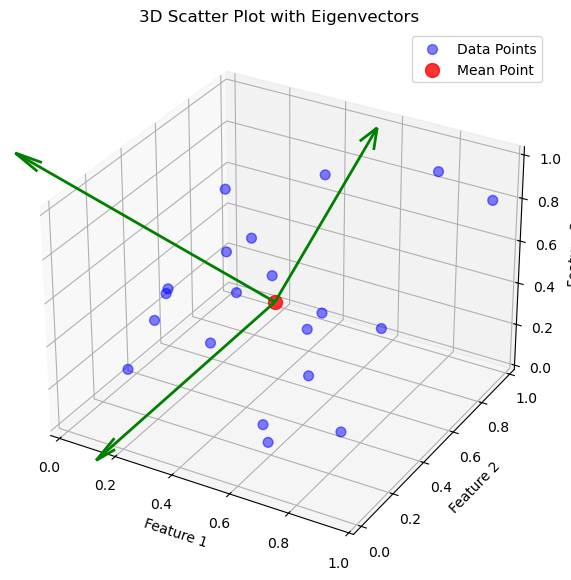

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Generate sample data
np.random.seed(42)
df = pd.DataFrame(np.random.rand(20, 3), columns=['feature1', 'feature2', 'feature3'])

# Compute the mean and eigenvectors
mean_point = df.mean().values
cov_matrix = np.cov(df.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], s=50, color='blue', alpha=0.5, label='Data Points')

# Mark the mean point
ax.scatter(*mean_point, s=100, color='red', alpha=0.8, label='Mean Point')

# Plot eigenvectors as arrows
for v in eigen_vectors.T:
    start = mean_point
    end = mean_point + v  # Scale can be adjusted if needed
    ax.quiver(start[0], start[1], start[2], 
              end[0] - start[0], end[1] - start[1], end[2] - start[2], 
              color='green', linewidth=2, arrow_length_ratio=0.1)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot with Eigenvectors')
plt.legend()

# Show the plot
plt.show()

In [155]:
pc = eigen_vectors[0:2]
pc

array([[-0.93400599,  0.35707133, -0.01152725],
       [-0.00106422, -0.03504663, -0.99938511]])

In [158]:
df4.shape

(40, 4)

In [164]:
df.shape

(20, 3)

In [162]:
transformed_df = np.dot(df4.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df4['target'].values
new_df.head()

,PC1,PC2,target
0,0.129980,1.802293,1
1,-0.156909,-0.455287,0
2,0.001430,0.650873,1
3,-1.583823,1.215747,1
4,2.295314,0.067242,1


In [165]:
new_df.shape

(40, 3)

In [163]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()